In [1]:
import itertools # 是 Python 的內建模組，提供了一組用於處理迭代器的函數和工具。
                 # 它包含了各種用於高效處理迭代器的函數，可以幫助我們編寫更簡潔、高效的代碼。
import sys # 是 Python 的內建模組，提供了與 Python 解釋器和運行環境相關的功能。


# sys.path 是一個列表，包含了 Python 解釋器在導入模組時會搜尋的路徑。
# 當你使用 import 語句導入模組時 Python 會依次在 sys.path 中的路徑下尋找對應的模組文件。
sys.path.append("../ecg-classification/")
# sys.path.append("C:\\Users\\Chen_Lab01\\Documents\\GitHub/ecg-classification")
# from IPython.display import Video

# import cv2
from matplotlib import pyplot as plt
plt.style.use("ggplot") #  是 Matplotlib 庫中用於設置繪圖樣式的函數。它使用了一種名為 "ggplot" 的預定義樣式
                        #  該樣式模仿了 R 語言的 ggplot2 繪圖包的外觀。

# print(sys.path)
from ecg_tools.config import EcgConfig, Mode
from ecg_tools.data_loader import DatasetConfig, get_data_loaders
from ecg_tools.model import ECGformer
from ecg_tools.train import ECGClassifierTrainer



## Data

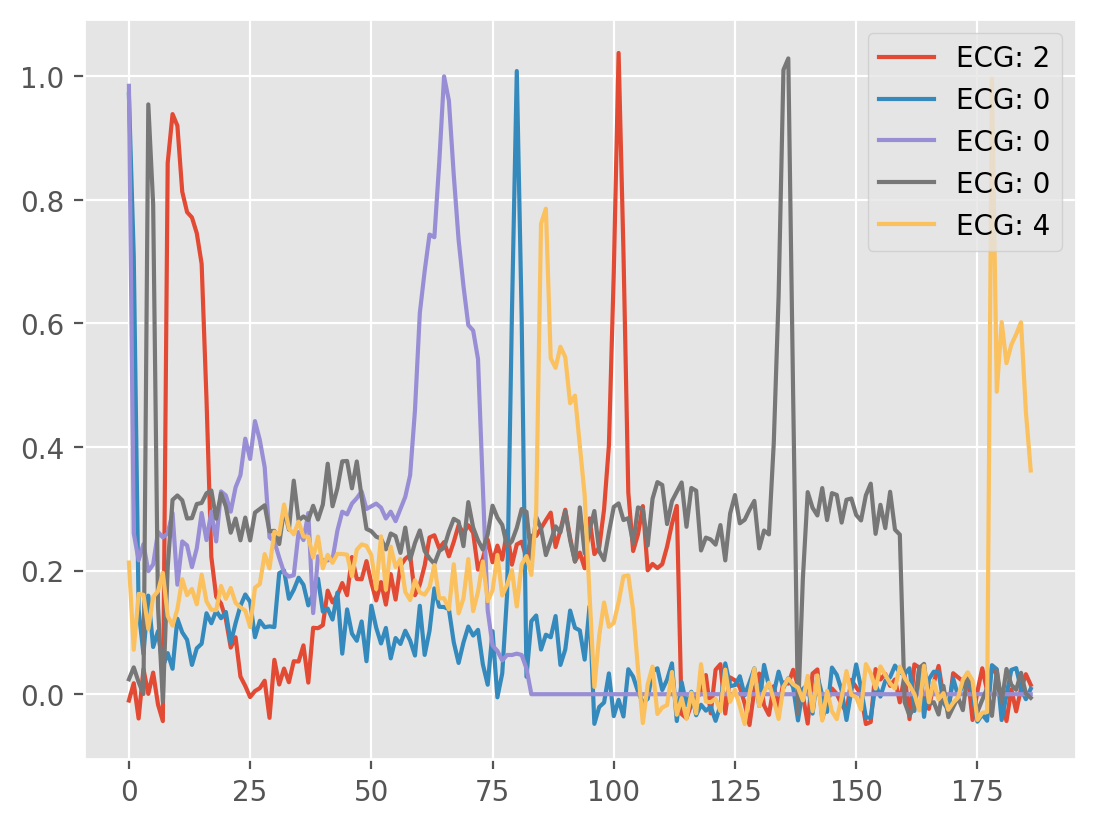

In [2]:
# 隨機抽 5 筆 ECG Data 出來觀察
NUM_EXAMPLES = 5
config = EcgConfig()
data_loaders = get_data_loaders(config.dataset)

plt.figure(1, dpi=200) # dpi 設置解析度
labels = []

for idx, data in enumerate(data_loaders[Mode.train]):
    if idx == NUM_EXAMPLES:
        break
    plt.plot(data[0][0, ...].squeeze().numpy())
    labels.append(int(data[1][0, ...].numpy()))

plt.legend([f"ECG: {label}" for label in labels])
%matplotlib inline
plt.show()

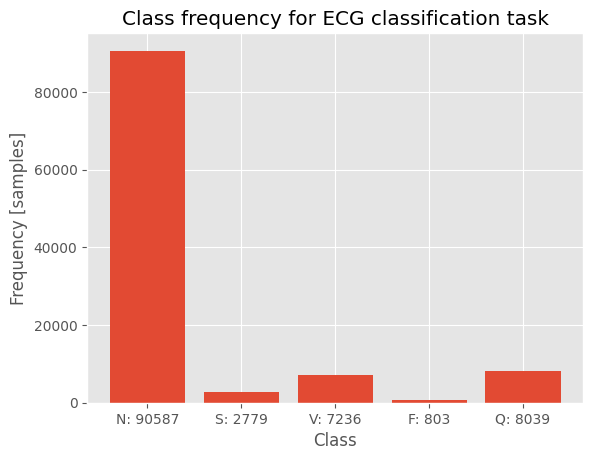

In [3]:
config = EcgConfig()
data_loaders = get_data_loaders(EcgConfig().dataset)
classes = ["N", "S", "V", "F", "Q"]
labels = {
    idx: 0 for idx in range(len(classes))
}

for data in itertools.chain(*list(data_loaders.values())):
    for label in data[1].numpy():
        labels[int(label)] += 1

plt.bar(range(len(classes)), list(labels.values()), tick_label=[f"{k}: {v}" for k, v in zip(classes, list(labels.values()))])
plt.title("Class frequency for ECG classification task")
plt.ylabel("Frequency [samples]")
plt.xlabel("Class")
%matplotlib inline
plt.show()

## Modeling

In [4]:
config = EcgConfig()
model = ECGformer(
    embed_size=config.model.embed_size,
    num_layers=config.model.num_layers,
    num_heads=config.model.num_heads,
    num_classes=config.model.num_classes,
    signal_length=config.model.signal_length,
    expansion=config.model.expansion,
    input_channels=config.model.input_channels
)
model

from torchinfo import summary
summary(model, input_size=(2, 187, 1),
       device='cpu',
       col_names=("input_size", "output_size", "num_params", "kernel_size"),
       depth=3) # depth = 3 表示只顯示到第三層

Layer (type:depth-idx)                             Input Shape               Output Shape              Param #                   Kernel Shape
ECGformer                                          [2, 187, 1]               [2, 5]                    36,096                    --
├─LinearEmbedding: 1-1                             [2, 187, 1]               [2, 188, 192]             192                       --
│    └─Linear: 2-1                                 [2, 187, 1]               [2, 187, 192]             384                       --
│    └─LayerNorm: 2-2                              [2, 187, 192]             [2, 187, 192]             384                       --
│    └─GELU: 2-3                                   [2, 187, 192]             [2, 187, 192]             --                        --
├─ModuleList: 1-2                                  --                        --                        --                        --
│    └─TransformerEncoderLayer: 2-4                [2, 188, 192]  

## Training

TRAINING: 0, loss: 0.2950375974178314. Target: [0], Prediction: [0]: 100%|██████████| 1369/1369 [01:38<00:00, 13.94it/s]                                           


TRAINING Accuracy: 0.8588728308677673
[[69715   117   978   108  1552]
 [ 2013   108    47     5    50]
 [ 3646    33  1459    42   608]
 [  573     0     6    60     2]
 [ 2303    13   205     1  3909]]
epoch_loss: 0.0002155132194432662


VALIDATION: 0, loss: 1.3130884170532227. Target: [4, 4, 4], Prediction: [0, 4, 4]: 100%|██████████| 343/343 [00:09<00:00, 36.71it/s]                               


VALIDATION Accuracy: 0.9158619046211243
[[17712    61    32   301    11]
 [  298   244     6     7     1]
 [  552    33   734   116    13]
 [   36     0     1   124     1]
 [  309     0     4     4  1291]]


TRAINING: 1, loss: 0.06433336436748505. Target: [0], Prediction: [0]: 100%|██████████| 1369/1369 [01:41<00:00, 13.49it/s]                                          


TRAINING Accuracy: 0.9135888814926147
[[69797   787   947   405   534]
 [ 1179   882   126     3    33]
 [ 1732   165  3587   122   182]
 [  357     6    24   254     0]
 [  704    54   145     3  5525]]
epoch_loss: 4.699296155404313e-05


TRAINING: 2, loss: 0.04796212166547775. Target: [0], Prediction: [0]: 100%|██████████| 1369/1369 [01:43<00:00, 13.22it/s]                                          


TRAINING Accuracy: 0.9317933320999146
[[70278   745   700   384   363]
 [  974  1125    96     5    23]
 [ 1265    92  4188   121   122]
 [  301     6    30   304     0]
 [  559    32    90     5  5745]]
epoch_loss: 3.503442050071421e-05


VALIDATION: 2, loss: 0.12467413395643234. Target: [4, 4, 4], Prediction: [4, 4, 4]: 100%|██████████| 343/343 [00:09<00:00, 34.89it/s]                              


VALIDATION Accuracy: 0.9467019438743591
[[17730   186    98    78    25]
 [  218   314    24     0     0]
 [  182     9  1188    58    11]
 [   46     0     4   112     0]
 [  131     6    33     0  1438]]


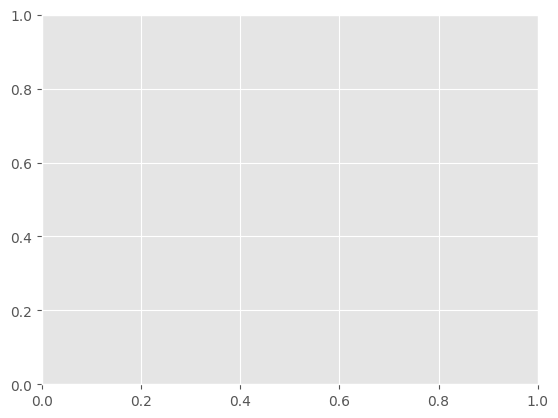

In [5]:
config = EcgConfig()
trainer = ECGClassifierTrainer(config)

train_confusion_matrix, eval_confusion_matrix, epoch_loss = trainer.train()

## Evaluating

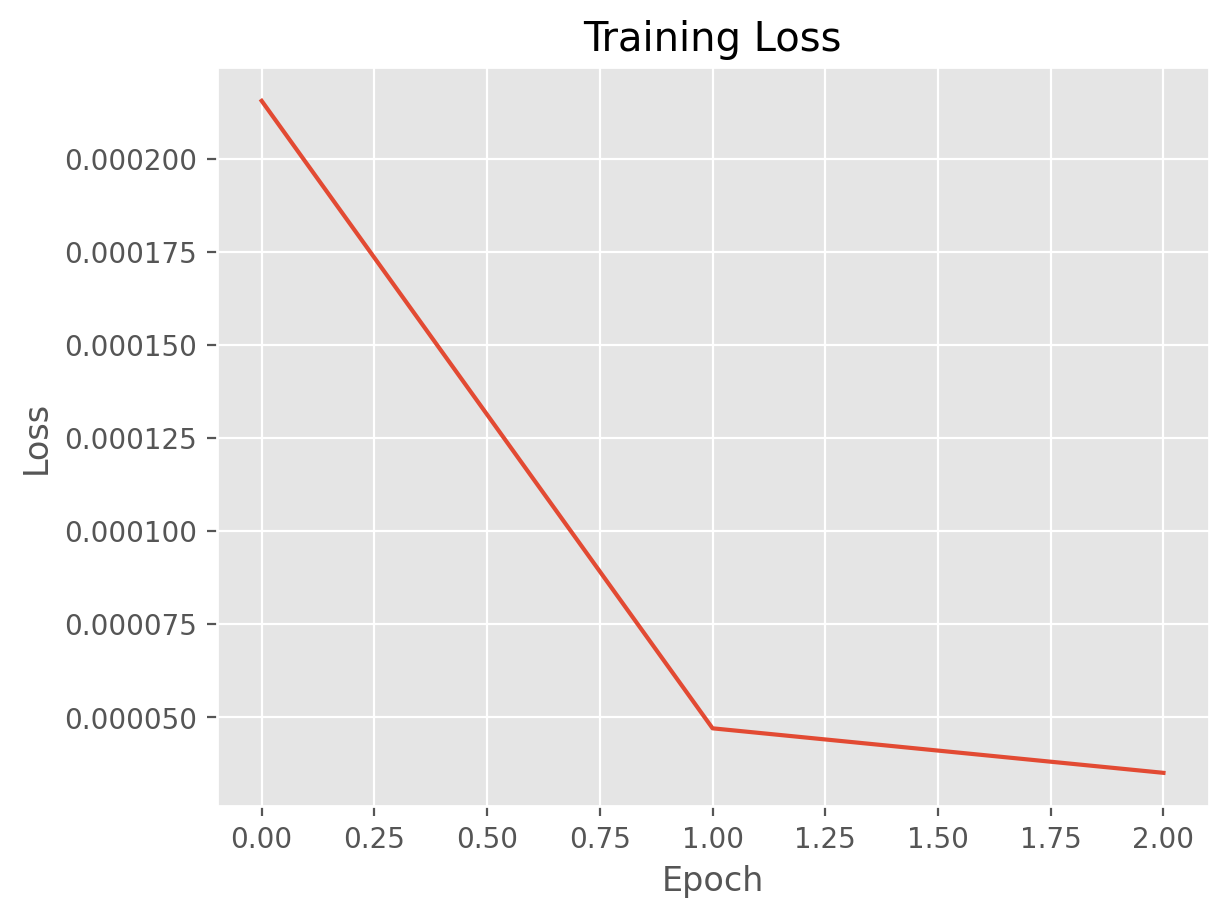

In [6]:
# plot loss
plt.figure(1, dpi=200)
plt.plot(epoch_loss)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
%matplotlib inline
plt.show()

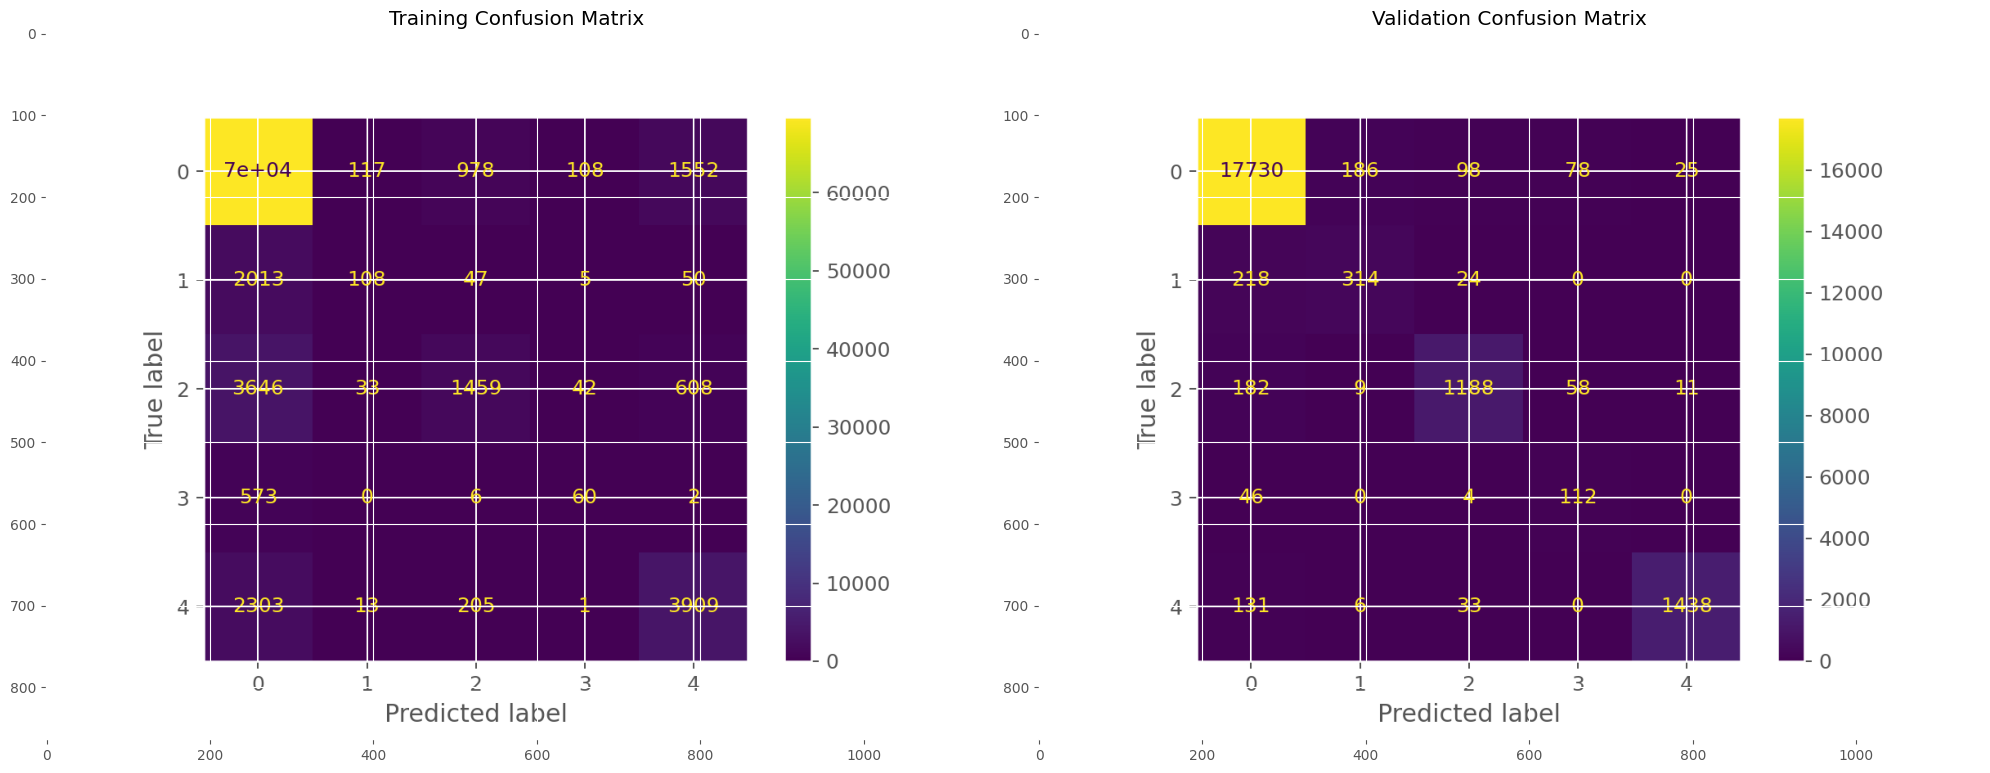

In [7]:
# Confusion matrix
plt.figure(figsize=(20, 12))

plt.subplot(1, 2, 1)
plt.imshow(train_confusion_matrix[0])
plt.title("Training Confusion Matrix")


plt.subplot(1, 2, 2)
plt.imshow(eval_confusion_matrix[-1])
plt.title("Validation Confusion Matrix")

plt.tight_layout()
plt.show()


### Save model and load model

In [10]:
import torch
torch.save(model, "..\\model_save\\model.pth")
model_test = torch.load("..\\model_save\\model.pth")
print(model_test)

ECGformer(
  (encoder): ModuleList(
    (0-5): 6 x TransformerEncoderLayer(
      (0): ResidualAdd(
        (block): Sequential(
          (0): LayerNorm((192,), eps=1e-05, elementwise_affine=True)
          (1): MultiHeadAttention(
            (queries_projection): Linear(in_features=192, out_features=192, bias=True)
            (values_projection): Linear(in_features=192, out_features=192, bias=True)
            (keys_projection): Linear(in_features=192, out_features=192, bias=True)
            (final_projection): Linear(in_features=192, out_features=192, bias=True)
          )
          (2): Dropout(p=0.1, inplace=False)
        )
      )
      (1): ResidualAdd(
        (block): Sequential(
          (0): LayerNorm((192,), eps=1e-05, elementwise_affine=True)
          (1): MLP(
            (0): Linear(in_features=192, out_features=768, bias=True)
            (1): GELU(approximate='none')
            (2): Linear(in_features=768, out_features=192, bias=True)
          )
          (2):